In [34]:
# load the import libraries
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import os
import string
import datetime
# from transformers import pipeline
# from transformers import AutoTokenizer,AutoModelForSequenceClassification
from collections import defaultdict
from tqdm import tqdm
import keras

In [35]:
## load the data set 

# News Data
scrap_data_path = "../Scraper/News-Money-control/final-data/"

money_cont_csv = ['../Scraper/News-Money-control/final-data/business-full-moneycontrol.csv',
 '../Scraper/News-Money-control/final-data/business-stocks-moneycontrol.csv',
 '../Scraper/News-Money-control/final-data/cnbc_headlines.csv',
 '../Scraper/News-Money-control/final-data/company-result-moneycontrol.csv',
 '../Scraper/News-Money-control/final-data/economy_money_control.csv',
 '../Scraper/News-Money-control/final-data/guardian_headlines.csv',
 '../Scraper/News-Money-control/final-data/market-moneycontrol.csv',
 '../Scraper/News-Money-control/final-data/news-comp-mcont-from-jul-23.csv',
 '../Scraper/News-Money-control/final-data/news_comp_jul-23-with_stock_id.csv',
 '../Scraper/News-Money-control/final-data/reuters_headlines.csv']

# news_file_list = []

# # Walk through the directory and list all files
# for foldername, subfolders, filenames in os.walk(scrap_data_path):
#     for filename in filenames:
#         file_path = os.path.join(foldername, filename)
#         news_file_list.append(file_path)


# news 2 
gapped_news_file_path = "../Scraper/News-Money-control/final-data/gapped_data"
    
news_file_gp_list = []

# Walk through the directory and list all files
for foldername, subfolders, filenames in os.walk(gapped_news_file_path):
    print(filenames)
    for filename in filenames:
        file_path = os.path.join(foldername, filename)
        news_file_gp_list.append(file_path)

# labels [Nifty indies]
nifty_label_path = "../Scraper/labels/Nifty/"
nifty_label_files = []

# file_path = os.path.join(folder_path, filename)

# Iterate through all files in the folder
for filename in os.listdir(nifty_label_path):
    if(str(filename).endswith(".csv")):
        print(f'Nifty File: {filename}')
        nifty_label_files.append(filename)       

        
# india vix load
india_vix_path = '../Scraper/labels/vix/'
vix_files = []

print("\n")
for filename in os.listdir(india_vix_path):
    if(str(filename).endswith(".csv")):
        print(f'Vix File: {filename}')
        vix_files.append(filename)  
        
news_file_gp_list

['short_0.csv', 'short_1.csv', 'short_2.csv', 'short_3.csv', 'short_4.csv']
Nifty File: NIFTY 200_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY 50_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY AUTO_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY CONSUMER DURABLES_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY FMCG_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY HEALTHCARE_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY INDIA MANUFACTURING_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY IT_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY METAL_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY MIDCAP 100_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY OIL & GAS_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY PHARMA_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY SMALLCAP 100_Historical_PR_01012000to07022024.csv


Vix File: 1_hist_india_vix_-09-02-2018-to-09-02-2019.csv
Vix File: 2_hist_india_vix_-09-02-

['../Scraper/News-Money-control/final-data/gapped_data\\short_0.csv',
 '../Scraper/News-Money-control/final-data/gapped_data\\short_1.csv',
 '../Scraper/News-Money-control/final-data/gapped_data\\short_2.csv',
 '../Scraper/News-Money-control/final-data/gapped_data\\short_3.csv',
 '../Scraper/News-Money-control/final-data/gapped_data\\short_4.csv']

In [36]:
# combine vix
temp_comb_df = []

for vix_file in vix_files:
    path = os.path.join(india_vix_path,vix_file)
    df = pd.read_csv(path)
    temp_comb_df.append(df)
    
vix_combine_df = pd.concat(temp_comb_df,ignore_index=True)
vix_combine_df['Date '] = pd.to_datetime(vix_combine_df['Date '])
vix_combine_df


,Date,Open,High,Low,Close,Prev. Close,Change,% Change
0,2018-02-09,17.7725,20.4225,15.1500,19.2300,17.7725,1.46,8.20
1,2018-02-12,19.2300,19.2300,16.5675,17.8825,19.2300,-1.35,-7.01
2,2018-02-14,17.8825,17.8825,15.5200,17.1850,17.8825,-0.70,-3.90
3,2018-02-15,17.1850,17.1850,14.0850,16.3150,17.1850,-0.87,-5.06
4,2018-02-16,16.3150,16.9725,12.5700,16.3775,16.3150,0.06,0.38
...,...,...,...,...,...,...,...,...
1478,2024-02-01,16.0475,16.1075,14.3600,14.4550,16.0475,-1.59,-9.92
1479,2024-02-02,14.4550,15.1325,14.0250,14.6975,14.4550,0.24,1.68
1480,2024-02-05,14.6975,16.0500,14.6975,15.6175,14.6975,0.92,6.26
1481,2024-02-06,15.6175,15.9825,15.0875,15.7850,15.6175,0.17,1.07


In [37]:
# function to remove punctuation
def remove_punctuation(text:str):
    return text.translate(str.maketrans("","",string.punctuation))

def preprocess_df(df,prefix,date_col="date",rename_date=True):
    #create copy
    df = df.copy()
    
    # function to add prefix
    add_prefix = lambda x: prefix+x
    
    # fix the columns name
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .map(remove_punctuation)
        .map(add_prefix)
    )
    
    # convert to pd date
    if(rename_date):
        date_col = prefix+date_col
        df[date_col] = pd.to_datetime(df[date_col])
        
    
    # sort by date
    df = df.sort_values(by=date_col)
    
    return df

In [38]:
vix_combine_df = preprocess_df(vix_combine_df,prefix='vix_')
vix_combine_df.rename({'vix_date': 'datetime'}, axis='columns',inplace=True)
vix_combine_df.set_index(vix_combine_df['datetime'],inplace=True)
vix_combine_df.drop('datetime',axis=1,inplace=True)
vix_combine_df

,vix_open,vix_high,vix_low,vix_close,vix_prev close,vix_change,vix_ change
datetime,,,,,,,
2018-02-09,17.7725,20.4225,15.1500,19.2300,17.7725,1.46,8.20
2018-02-12,19.2300,19.2300,16.5675,17.8825,19.2300,-1.35,-7.01
2018-02-14,17.8825,17.8825,15.5200,17.1850,17.8825,-0.70,-3.90
2018-02-15,17.1850,17.1850,14.0850,16.3150,17.1850,-0.87,-5.06
2018-02-16,16.3150,16.9725,12.5700,16.3775,16.3150,0.06,0.38
...,...,...,...,...,...,...,...
2024-02-01,16.0475,16.1075,14.3600,14.4550,16.0475,-1.59,-9.92
2024-02-02,14.4550,15.1325,14.0250,14.6975,14.4550,0.24,1.68
2024-02-05,14.6975,16.0500,14.6975,15.6175,14.6975,0.92,6.26


In [9]:
nifty_label_files

['NIFTY 200_Historical_PR_01012000to07022024.csv',
 'NIFTY 50_Historical_PR_01012000to07022024.csv',
 'NIFTY AUTO_Historical_PR_01012000to07022024.csv',
 'NIFTY CONSUMER DURABLES_Historical_PR_01012000to07022024.csv',
 'NIFTY FMCG_Historical_PR_01012000to07022024.csv',
 'NIFTY HEALTHCARE_Historical_PR_01012000to07022024.csv',
 'NIFTY INDIA MANUFACTURING_Historical_PR_01012000to07022024.csv',
 'NIFTY IT_Historical_PR_01012000to07022024.csv',
 'NIFTY METAL_Historical_PR_01012000to07022024.csv',
 'NIFTY MIDCAP 100_Historical_PR_01012000to07022024.csv',
 'NIFTY OIL & GAS_Historical_PR_01012000to07022024.csv',
 'NIFTY PHARMA_Historical_PR_01012000to07022024.csv',
 'NIFTY SMALLCAP 100_Historical_PR_01012000to07022024.csv']

In [39]:
df = pd.read_csv(os.path.join(nifty_label_path,nifty_label_files[1]))[['Date','Open','High','Low',"Close"]]
df['datetime'] = pd.to_datetime(df['Date'])
df.set_index('datetime',inplace=True)
df.drop('Date',axis=1,inplace=True)
df

,Open,High,Low,Close
datetime,,,,
2024-02-07,22045.05,22053.30,21860.15,21930.50
2024-02-06,21825.20,21951.40,21737.55,21929.40
2024-02-05,21921.05,21964.30,21726.95,21771.70
2024-02-02,21812.75,22126.80,21805.55,21853.80
2024-02-01,21780.65,21832.95,21658.75,21697.45
...,...,...,...,...
2000-01-07,1616.60,1628.25,1597.20,1613.30
2000-01-06,1595.80,1639.00,1595.80,1617.60
2000-01-05,1634.55,1635.50,1555.05,1595.80


In [40]:
foriegn_indicator_path = "../Scraper/labels/global_indices.csv"
fi_df = pd.read_csv(foriegn_indicator_path)
fi_df['Date'] = pd.to_datetime(fi_df['Date'])
fi_df.set_index(fi_df['Date'],inplace=True)
fi_df.drop('Date',axis=1,inplace=True)
fi_df

,^DJI_open,^DJI_high,^DJI_low,^DJI_close,^DJI_volume,BTC-USD_open,BTC-USD_high,BTC-USD_low,BTC-USD_close,BTC-USD_volume,...,^GSPC_open,^GSPC_high,^GSPC_low,^GSPC_close,^GSPC_volume,^NSEI_open,^NSEI_high,^NSEI_low,^NSEI_close,^NSEI_volume
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,24809.349609,24864.189453,24741.699219,24824.009766,341130000,13625.000000,15444.599609,13163.599609,14982.099609,16846600192,...,2683.729980,2695.889893,2682.360107,2695.810059,3397430000,10477.549805,10495.200195,10404.650391,10442.200195,153400
2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,456790000,14978.200195,15572.799805,14844.500000,15201.000000,16871900160,...,2697.850098,2714.370117,2697.770020,2713.060059,3544030000,10482.650391,10503.599609,10429.549805,10443.200195,167300
2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,403280000,15270.700195,15739.700195,14522.200195,15599.200195,21783199744,...,2719.310059,2729.290039,2719.070068,2723.989990,3697340000,10469.400391,10513.000000,10441.450195,10504.799805,174900
2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,358020000,15477.200195,17705.199219,15202.799805,17429.500000,23840899072,...,2731.330078,2743.449951,2727.919922,2743.149902,3239280000,10534.250000,10566.099609,10520.099609,10558.849609,180900
2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,341390000,16476.199219,16537.900391,14208.200195,15170.099609,18413899776,...,2742.669922,2748.510010,2737.600098,2747.709961,3246160000,10591.700195,10631.200195,10588.549805,10623.599609,169000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28,38938.078125,38956.460938,38741.679688,38949.019531,272560000,57071.097656,63913.132812,56738.425781,62504.789062,83239156760,...,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,22214.099609,22229.150391,21915.849609,21951.150391,203000
2024-02-29,39013.750000,39074.128906,38809.281250,38996.390625,519690000,62499.183594,63585.644531,60498.730469,61198.382812,65496611844,...,5085.359863,5104.990234,5061.890137,5096.270020,5219740000,21935.199219,22060.550781,21860.650391,21982.800781,360200
2024-03-01,38989.511719,39120.359375,38850.500000,39087.378906,331030000,61168.062500,63155.101562,60802.527344,62440.632812,40186368423,...,5098.509766,5140.330078,5094.160156,5137.080078,4748110000,22048.300781,22353.300781,22047.750000,22338.750000,351500


In [12]:
sentiments = pd.read_csv('sentiments.csv',index_col='datetime')
sentiments

,pos,neg,neu
datetime,,,
17-12-2017 00:00,"[0.07908040285110474, 0.04003581404685974, 0.1...","[0.017684053629636765, 0.05556540936231613, 0....","[0.9032355546951294, 0.9043987989425659, 0.845..."
18-12-2017 00:00,"[0.031160427257418633, 0.017501013353466988, 0...","[0.5048685073852539, 0.834547758102417, 0.1954...","[0.4639711081981659, 0.1479511559009552, 0.772..."
19-12-2017 00:00,"[0.52845299243927, 0.0711444765329361, 0.01870...","[0.1480075567960739, 0.018141455948352814, 0.8...","[0.3235394358634949, 0.9107140302658081, 0.117..."
20-12-2017 00:00,"[0.04880041256546974, 0.335614413022995, 0.019...","[0.04672257974743843, 0.05887686461210251, 0.8...","[0.9044770002365112, 0.6055087447166443, 0.144..."
21-12-2017 00:00,"[0.30990365147590637, 0.030400350689888, 0.096...","[0.11669674515724182, 0.497185081243515, 0.657...","[0.5733996629714966, 0.4724145531654358, 0.245..."
...,...,...,...
08-02-2024 00:28,[0.9561301469802856],[0.01568293198943138],[0.028186922892928123]
08-02-2024 06:22,[0.5546689033508301],[0.015996316447854042],[0.4293347895145416]
08-02-2024 08:29,[0.12065272778272629],[0.09014798700809479],[0.7891993522644043]


In [125]:
for index, row in sentiments.iterrows():
    # Calculate the mean of 'pos', 'neg', and 'neu' arrays
    pos_mean = np.mean(eval(row['pos']))
    neg_mean = np.mean(eval(row['neg']))
    neu_mean = np.mean(eval(row['neu']))
    
    # Replace the arrays with mean values
    sentiments.at[index, 'pos'] = pos_mean
    sentiments.at[index, 'neg'] = neg_mean
    sentiments.at[index, 'neu'] = neu_mean

In [126]:
sentiments.set_index(pd.to_datetime(sentiments.index.str.split().str[0], format='%d-%m-%Y'),inplace=True)
sentiments = sentiments.groupby(sentiments.index).mean()
sentiments

,pos,neg,neu
datetime,,,
2017-12-17,0.174274,0.287308,0.538418
2017-12-18,0.134950,0.427190,0.437860
2017-12-19,0.098566,0.410148,0.491286
2017-12-20,0.153500,0.408590,0.437910
2017-12-21,0.094427,0.396806,0.508767
...,...,...,...
2024-02-04,0.544502,0.322572,0.132927
2024-02-05,0.471807,0.244561,0.283631
2024-02-06,0.420637,0.220955,0.358408


In [57]:
vix_combine_df

,vix_open,vix_high,vix_low,vix_close,vix_prev close,vix_change,vix_ change
datetime,,,,,,,
2018-02-09,17.7725,20.4225,15.1500,19.2300,17.7725,1.46,8.20
2018-02-12,19.2300,19.2300,16.5675,17.8825,19.2300,-1.35,-7.01
2018-02-14,17.8825,17.8825,15.5200,17.1850,17.8825,-0.70,-3.90
2018-02-15,17.1850,17.1850,14.0850,16.3150,17.1850,-0.87,-5.06
2018-02-16,16.3150,16.9725,12.5700,16.3775,16.3150,0.06,0.38
...,...,...,...,...,...,...,...
2024-02-01,16.0475,16.1075,14.3600,14.4550,16.0475,-1.59,-9.92
2024-02-02,14.4550,15.1325,14.0250,14.6975,14.4550,0.24,1.68
2024-02-05,14.6975,16.0500,14.6975,15.6175,14.6975,0.92,6.26


In [1015]:
# combined_df = pd.merge(df,sentiments, left_index=True, right_index=True, how='inner')
combined_df = pd.merge(fi_df,vix_combine_df, left_index=True, right_index=True, how='inner')
# combined_df = pd.merge(combined_df,sentiments, left_index=True, right_index=True, how='inner')


# Merge combined_df and nifty_df on datetime
# combined_df = pd.merge(combined_df, vix_combine_df, left_index=True, right_index=True, how='inner')

combined_df

,^DJI_open,^DJI_high,^DJI_low,^DJI_close,^DJI_volume,BTC-USD_open,BTC-USD_high,BTC-USD_low,BTC-USD_close,BTC-USD_volume,...,^NSEI_low,^NSEI_close,^NSEI_volume,vix_open,vix_high,vix_low,vix_close,vix_prev close,vix_change,vix_ change
2018-02-09,23992.669922,24382.140625,23360.289062,24190.900391,735030000,8271.839844,8736.980469,7884.709961,8736.980469,6784820224,...,10398.200195,10454.950195,191600,17.7725,20.4225,15.1500,19.2300,17.7725,1.46,8.20
2018-02-12,24337.759766,24765.160156,24290.480469,24601.269531,496610000,8141.430176,8985.919922,8141.430176,8926.570312,6256439808,...,10485.400391,10539.750000,217400,19.2300,19.2300,16.5675,17.8825,19.2300,-1.35,-7.01
2018-02-14,24535.820312,24925.949219,24490.359375,24893.490234,431160000,8599.919922,9518.540039,8599.919922,9494.629883,7909819904,...,10456.650391,10500.900391,229200,17.8825,17.8825,15.5200,17.1850,17.8825,-0.70,-3.90
2018-02-15,25047.820312,25203.949219,24809.419922,25200.369141,416780000,9488.320312,10234.799805,9395.580078,10166.400391,9062540288,...,10511.049805,10545.500000,210600,17.1850,17.1850,14.0850,16.3150,17.1850,-0.87,-5.06
2018-02-16,25165.939453,25432.419922,25149.259766,25219.380859,406730000,10135.700195,10324.099609,9824.820312,10233.900391,7296159744,...,10434.049805,10452.299805,184300,16.3150,16.9725,12.5700,16.3775,16.3150,0.06,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,38175.339844,38522.500000,38106.839844,38519.839844,321830000,42569.761719,43243.167969,41879.191406,43075.773438,21423953779,...,21658.750000,21697.449219,332500,16.0475,16.1075,14.3600,14.4550,16.0475,-1.59,-9.92
2024-02-02,38448.101562,38783.621094,38336.570312,38654.421875,379760000,43077.640625,43422.488281,42584.335938,43185.859375,18603843039,...,21805.550781,21853.800781,442800,14.4550,15.1325,14.0250,14.6975,14.4550,0.24,1.68
2024-02-05,38546.769531,38633.878906,38220.398438,38380.121094,322290000,42577.621094,43494.250000,42264.816406,42658.667969,18715487317,...,21726.949219,21771.699219,440800,14.6975,16.0500,14.6975,15.6175,14.6975,0.92,6.26
2024-02-06,38392.898438,38545.281250,38350.460938,38521.359375,276140000,42657.390625,43344.148438,42529.019531,43084.671875,16798476726,...,21737.550781,21929.400391,371000,15.6175,15.9825,15.0875,15.7850,15.6175,0.17,1.07


In [1016]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
^DJI_open,1431.0,3.012530e+04,4.242224e+03,1.902836e+04,2.608452e+04,3.043904e+04,3.398530e+04,3.861389e+04
^DJI_high,1431.0,3.030320e+04,4.240926e+03,1.912101e+04,2.620480e+04,3.071563e+04,3.415929e+04,3.878362e+04
^DJI_low,1431.0,2.993767e+04,4.252048e+03,1.821365e+04,2.591062e+04,3.022690e+04,3.379813e+04,3.857101e+04
^DJI_close,1431.0,3.012885e+04,4.250550e+03,1.859193e+04,2.606335e+04,3.048313e+04,3.399241e+04,3.867736e+04
^DJI_volume,1431.0,3.436803e+08,1.041556e+08,8.615000e+07,2.787250e+08,3.240900e+08,3.853150e+08,9.159900e+08
...,...,...,...,...,...,...,...,...
vix_low,1431.0,1.648317e+01,7.202624e+00,0.000000e+00,1.218250e+01,1.485250e+01,1.848750e+01,7.597250e+01
vix_close,1431.0,1.808782e+01,7.644256e+00,1.013500e+01,1.362000e+01,1.630250e+01,2.027375e+01,8.360750e+01
vix_prev close,1431.0,1.808765e+01,7.638837e+00,1.013500e+01,1.362500e+01,1.630250e+01,2.025750e+01,8.360750e+01
vix_change,1431.0,1.467505e-04,1.226769e+00,-8.230000e+00,-4.800000e-01,-5.000000e-02,4.000000e-01,1.162000e+01


<AxesSubplot: >

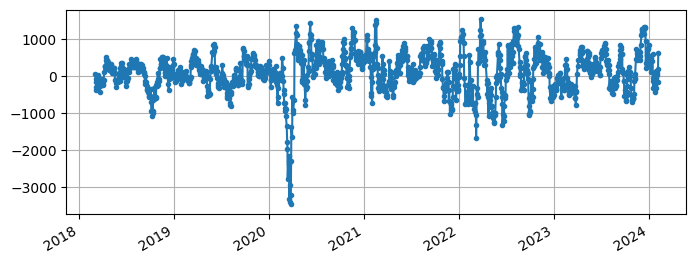

In [1017]:
combined_df['^NSEI_open'].diff(12).plot(grid=True,marker='.',figsize=(8,3))

In [1018]:
combined_df.columns

Index(['^DJI_open', '^DJI_high', '^DJI_low', '^DJI_close', '^DJI_volume',
       'BTC-USD_open', 'BTC-USD_high', 'BTC-USD_low', 'BTC-USD_close',
       'BTC-USD_volume', 'ETH-USD_open', 'ETH-USD_high', 'ETH-USD_low',
       'ETH-USD_close', 'ETH-USD_volume', 'CL=F_open', 'CL=F_high', 'CL=F_low',
       'CL=F_close', 'CL=F_volume', 'GC=F_open', 'GC=F_high', 'GC=F_low',
       'GC=F_close', 'GC=F_volume', 'SI=F_open', 'SI=F_high', 'SI=F_low',
       'SI=F_close', 'SI=F_volume', 'NG=F_open', 'NG=F_high', 'NG=F_low',
       'NG=F_close', 'NG=F_volume', 'DX-Y.NYB_open', 'DX-Y.NYB_high',
       'DX-Y.NYB_low', 'DX-Y.NYB_close', 'DX-Y.NYB_volume', '^BSESN_open',
       '^BSESN_high', '^BSESN_low', '^BSESN_close', '^BSESN_volume',
       '^NDX_open', '^NDX_high', '^NDX_low', '^NDX_close', '^NDX_volume',
       '^GSPC_open', '^GSPC_high', '^GSPC_low', '^GSPC_close', '^GSPC_volume',
       '^NSEI_open', '^NSEI_high', '^NSEI_low', '^NSEI_close', '^NSEI_volume',
       'vix_open', 'vix_high', 'vix

In [278]:
# combined_df['neg'].plot(grid=True,marker='.',figsize=(8,3))

In [726]:
# selected_df = combined_df.copy()

# selected_df = combined_df.drop(['^NSEI_close','^NSEI_low','^NSEI_high'],axis=1)
# selected_df['^NSEI_open'] = selected_df['^NSEI_open']
# selected_df = pd.DataFrame(normalizer.fit_transform(selected_df),columns=selected_df.columns,index=selected_df.index)

# sequence_length = 5

# timeseries_ds = tf.keras.utils.timeseries_dataset_from_array(selected_df,targets=selected_df['Open'][sequence_length:],sequence_length=5,batch_size=64)

In [1037]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sequence_length = 28
batch_size = 16
target_col = '^NSEI_open'

selected_df = combined_df.copy()

# selected_df[target_col] = selected_df[target_col].shift(-1)

selected_df = pd.DataFrame(scaler.fit_transform(selected_df),index=selected_df.index,columns=selected_df.columns)

train_df = selected_df[:'2024-01-01']
# train_df = selected_df[:'2023-11-20']
# val_df = selected_df['2023-11-20':'2024-01-01']
test_df = selected_df['2024-01-01':]


train_ds = tf.keras.utils.timeseries_dataset_from_array(
    train_df.to_numpy(),
    targets=train_df[target_col],
    sequence_length=sequence_length,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.timeseries_dataset_from_array(
    val_df.to_numpy(),
    targets=val_df[target_col],
    sequence_length=sequence_length,
    batch_size=batch_size,
)

test_ds = tf.keras.utils.timeseries_dataset_from_array(
    test_df.to_numpy(),
    targets=test_df[target_col],
    sequence_length=sequence_length,
    batch_size=batch_size,
)

In [1038]:
simple_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(512,return_sequences=True,input_shape=[None,67]),
#     keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(1)
])
# opt = tf.keras.optimizers.SGD(learning_rate=0.2,momentum=0.9)
# simple_rnn.compile(loss=keras.losses.Huber(),optimizer=opt,metrics=['mae'])
simple_rnn.compile(loss='mae',optimizer='adam',metrics=['mae'])
simple_rnn.summary()

Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_160 (SimpleRNN)  (None, None, 512)         296960    
                                                                 
 dense_156 (Dense)           (None, None, 1)           513       
                                                                 
Total params: 297,473
Trainable params: 297,473
Non-trainable params: 0
_________________________________________________________________


In [1039]:
early_stopping = keras.callbacks.EarlyStopping(patience=5,monitor='mae')
hist = simple_rnn.fit(train_ds,callbacks=[early_stopping],epochs=100)

Epoch 1/100
87/87 [==============================] - 5s 44ms/step - loss: 0.2191 - mae: 0.2191
Epoch 2/100
87/87 [==============================] - 5s 52ms/step - loss: 0.0718 - mae: 0.0718
Epoch 3/100
87/87 [==============================] - 5s 55ms/step - loss: 0.0854 - mae: 0.0854
Epoch 4/100
87/87 [==============================] - 4s 46ms/step - loss: 0.1008 - mae: 0.1008
Epoch 5/100
87/87 [==============================] - 5s 54ms/step - loss: 0.0936 - mae: 0.0936
Epoch 6/100
87/87 [==============================] - 4s 50ms/step - loss: 0.0841 - mae: 0.0841
Epoch 7/100
87/87 [==============================] - 4s 44ms/step - loss: 0.0665 - mae: 0.0665
Epoch 8/100
87/87 [==============================] - 4s 42ms/step - loss: 0.0616 - mae: 0.0616
Epoch 9/100
87/87 [==============================] - 3s 39ms/step - loss: 0.0579 - mae: 0.0579
Epoch 10/100
87/87 [==============================] - 4s 44ms/step - loss: 0.0558 - mae: 0.0558
Epoch 11/100
87/87 [=============================

<AxesSubplot: >

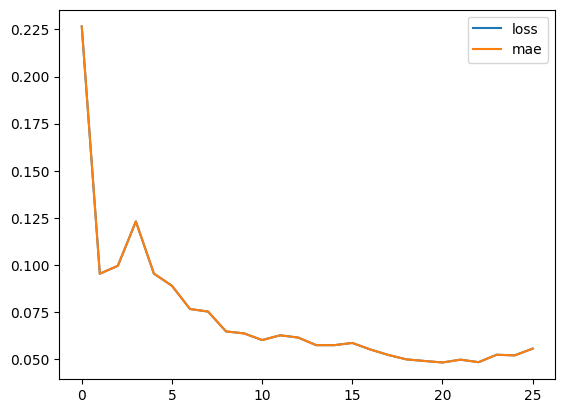

In [1035]:
pd.DataFrame(hist.history).plot()

In [1030]:
simple_rnn.evaluate(test_ds)

1/1 [==============================] - 1s 533ms/step - loss: 0.6441 - mae: 0.6441


[0.644106388092041, 0.644106388092041]

1/1 [==============================] - 0s 33ms/step


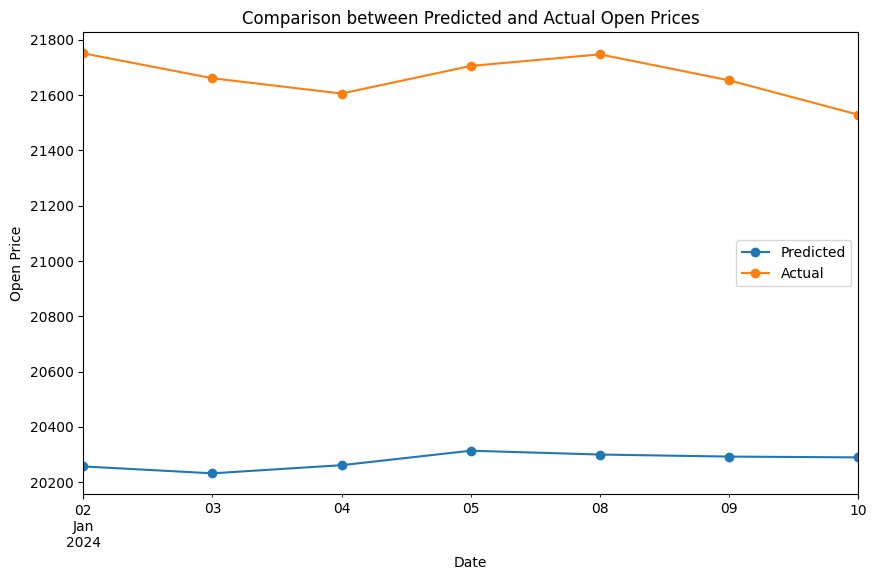

In [1036]:
def predict_n_days(model, dataset, n_days):
    predicted_values = []
    for i in range(n_days):
        inputs = dataset[i:i+sequence_length][np.newaxis,...]
        prediction = model.predict(inputs)
        predicted_values.append(prediction[0][0][-1])
    return predicted_values

n_days = 14
predicted_values = predict_n_days(simple_rnn, test_df.to_numpy(), n_days)

# Plotting
tdf = test_df.copy()
tdf['^NSEI_open'][:n_days] = predicted_values

# Plotting with labels
plt.figure(figsize=(10, 6))
pd.DataFrame(scaler.inverse_transform(tdf), index=test_df.index, columns=test_df.columns)[:future_days]['^NSEI_open'].plot(label='Predicted', marker='o')
pd.DataFrame(scaler.inverse_transform(test_df), index=test_df.index, columns=test_df.columns)[:future_days]['^NSEI_open'].plot(label='Actual', marker='o')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Comparison between Predicted and Actual Open Prices')
plt.legend()
plt.show()

### RNN Predict 14 days in future 

In [817]:
from sklearn.preprocessing import MinMaxScaler

# Scaler
scaler = MinMaxScaler()

# Create copy of Data frame
selected_df = combined_df.copy() # copy data frame

# Scaler Data frame
selected_df = pd.DataFrame(scaler.fit_transform(selected_df),index=selected_df.index,columns=selected_df.columns)

sequence_length = 56  # Train upto last sequence_len days
batch_size = 16  # batch size len / batch_size feed at a time 
target_col = '^NSEI_open' # need to predict 

# Split data
train_df = selected_df[:'2023-11-20']
val_df = selected_df['2023-11-20':'2024-01-01']
test_df = selected_df['2024-01-01':]

In [818]:
future_days = 7
batch_size = 16

def split_input_and_target(ds,ahead=future_days,target_col=0):
    return ds[:,:-ahead],ds[:,-ahead:,target_col]

# Create TF data frame to feed easly
ahead_train_ds = tf.keras.utils.timeseries_dataset_from_array(
                    train_df.to_numpy(),
                    targets=None,
                    sequence_length=sequence_length+future_days,
                    batch_size=batch_size
).map(split_input_and_target)

ahead_val_ds = tf.keras.utils.timeseries_dataset_from_array(
                    val_df.to_numpy(),
                    targets=None,
                    sequence_length=sequence_length+future_days,
                    batch_size=batch_size
).map(split_input_and_target)

In [819]:
simple_ahead_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(512,input_shape=[None,67]),
#     keras.layers.SimpleRNN(512,return_sequences=True),
#     keras.layers.Dropout(.2),
#     keras.layers.SimpleRNN(128,return_sequences=True),
#     keras.layers.Dense(1024),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(.2),
    keras.layers.Dense(future_days)
])

simple_ahead_rnn.compile(loss=keras.losses.Huber(),optimizer=opt,metrics=['mae'])
simple_ahead_rnn.summary()

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_104 (SimpleRNN)  (None, 512)               296960    
                                                                 
 dense_99 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 300,551
Trainable params: 300,551
Non-trainable params: 0
_________________________________________________________________


In [820]:
early_stopping =  keras.callbacks.EarlyStopping(patience=5,monitor='loss')
hist_ahead = simple_ahead_rnn.fit(ahead_train_ds,validation_data=ahead_val_ds,epochs=100,callbacks=[early_stopping])

Epoch 1/100
83/83 [==============================] - 8s 85ms/step - loss: 0.0232 - mae: 0.1663
Epoch 2/100
83/83 [==============================] - 7s 88ms/step - loss: 0.0104 - mae: 0.1113
Epoch 3/100
83/83 [==============================] - 5s 57ms/step - loss: 0.0081 - mae: 0.0973
Epoch 4/100
83/83 [==============================] - 5s 56ms/step - loss: 0.0095 - mae: 0.1064
Epoch 5/100
83/83 [==============================] - 6s 73ms/step - loss: 0.0069 - mae: 0.0911
Epoch 6/100
83/83 [==============================] - 8s 92ms/step - loss: 0.0068 - mae: 0.0885
Epoch 7/100
83/83 [==============================] - 6s 68ms/step - loss: 0.0068 - mae: 0.0915
Epoch 8/100
83/83 [==============================] - 8s 92ms/step - loss: 0.0055 - mae: 0.0837
Epoch 9/100
83/83 [==============================] - 6s 78ms/step - loss: 0.0044 - mae: 0.0727
Epoch 10/100
83/83 [==============================] - 6s 69ms/step - loss: 0.0043 - mae: 0.0729
Epoch 11/100
83/83 [=============================

<AxesSubplot: >

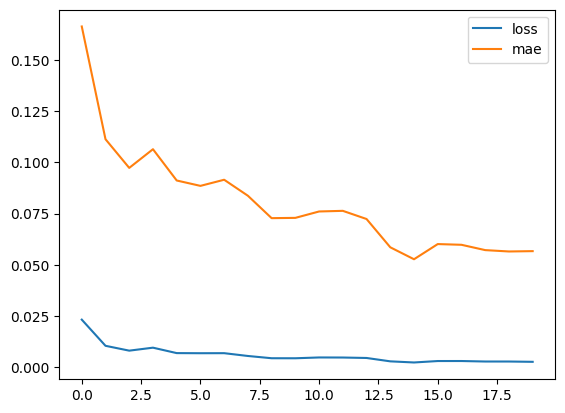

In [821]:
pd.DataFrame(hist_ahead.history).plot()

In [822]:
X = test_df.to_numpy()[np.newaxis,:sequence_length]
Y_pred = simple_ahead_rnn.predict(X)

1/1 [==============================] - 0s 147ms/step


In [823]:
Y_pred[0]

array([0.98227304, 0.89412117, 0.90428686, 1.023427  , 0.7792755 ,
       0.9078697 , 0.80951977], dtype=float32)

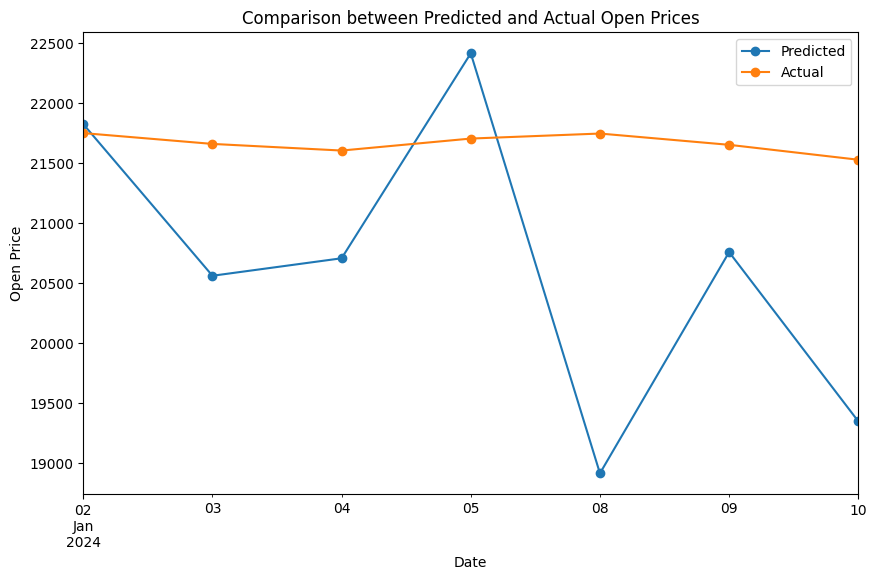

In [824]:
tdf = test_df.copy()
tdf['^NSEI_open'][:future_days] = Y_pred[0]

# Plotting with labels
plt.figure(figsize=(10, 6))
pd.DataFrame(scaler.inverse_transform(tdf), index=test_df.index, columns=test_df.columns)[:future_days]['^NSEI_open'].plot(label='Predicted', marker='o')
pd.DataFrame(scaler.inverse_transform(test_df), index=test_df.index, columns=test_df.columns)[:future_days]['^NSEI_open'].plot(label='Actual', marker='o')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Comparison between Predicted and Actual Open Prices')
plt.legend()
plt.show()

### LSTM with 14 day prediction

In [768]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=512, input_shape=[None, 67]))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.LSTM(units=512, return_sequences=True))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.LSTM(units=128))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(14))

# Compile the model
model.compile(optimizer='adam', loss='mae',metrics=['mae'])
model.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 512)               1187840   
                                                                 
 dense_96 (Dense)            (None, 14)                7182      
                                                                 
Total params: 1,195,022
Trainable params: 1,195,022
Non-trainable params: 0
_________________________________________________________________


In [771]:
early_stopping = keras.callbacks.EarlyStopping(patience=5,monitor='mae')
hist = model.fit(ahead_train_ds,validation_data=ahead_val_ds,callbacks=[early_stopping],epochs=100)

Epoch 1/100
85/85 [==============================] - 14s 168ms/step - loss: 0.0431 - mae: 0.0431
Epoch 2/100
85/85 [==============================] - 18s 214ms/step - loss: 0.0372 - mae: 0.0372
Epoch 3/100
85/85 [==============================] - 19s 219ms/step - loss: 0.0364 - mae: 0.0364
Epoch 4/100
85/85 [==============================] - 18s 212ms/step - loss: 0.0374 - mae: 0.0374
Epoch 5/100
85/85 [==============================] - 18s 210ms/step - loss: 0.0399 - mae: 0.0399
Epoch 6/100
85/85 [==============================] - 17s 200ms/step - loss: 0.0414 - mae: 0.0414
Epoch 7/100
85/85 [==============================] - 16s 190ms/step - loss: 0.0407 - mae: 0.0407
Epoch 8/100
85/85 [==============================] - 13s 158ms/step - loss: 0.0384 - mae: 0.0384


<AxesSubplot: >

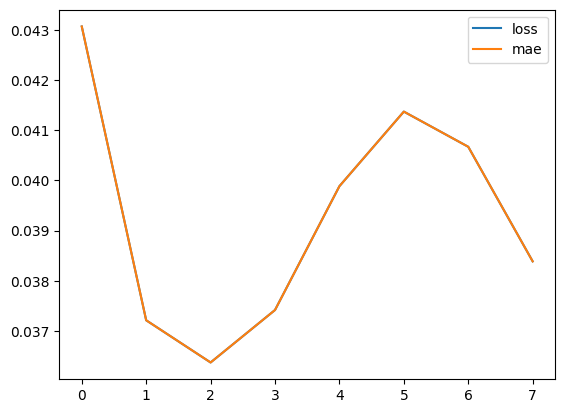

In [772]:
pd.DataFrame(hist.history).plot()

In [773]:
X = test_df.to_numpy()[np.newaxis,:sequence_length]
Y_pred = model.predict(test_ds)

1/1 [==============================] - 1s 733ms/step


In [777]:
Y_pred

array([[0.7944308 , 0.81424344, 0.81655866, 0.8224578 , 0.8109419 ,
        0.8105706 , 0.7984737 , 0.8171231 , 0.8293558 , 0.8035127 ,
        0.79875445, 0.79328513, 0.8213941 , 0.8062741 ],
       [0.7979019 , 0.8177875 , 0.8204497 , 0.82627404, 0.8145497 ,
        0.8142034 , 0.8017921 , 0.8207558 , 0.8334779 , 0.8076444 ,
        0.8025359 , 0.7971829 , 0.82615834, 0.8101913 ]], dtype=float32)

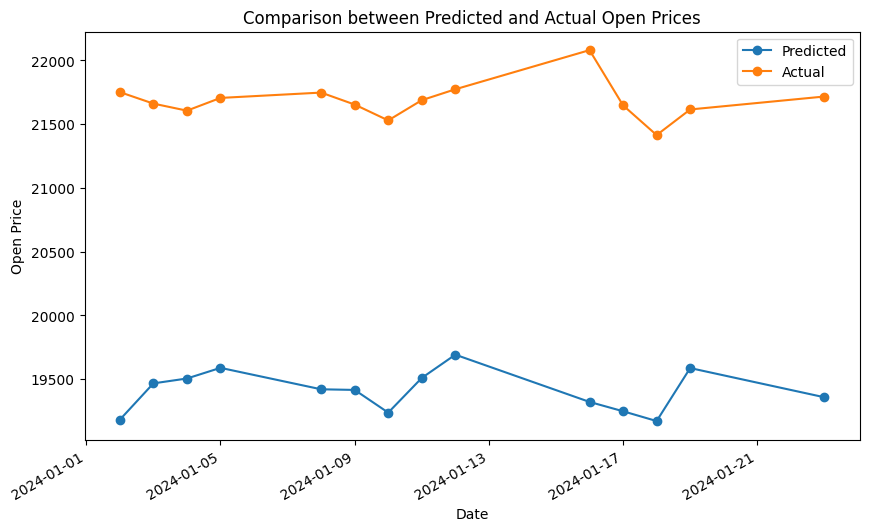

In [790]:
tdf = test_df.copy()
tdf['^NSEI_open'][:14] = Y_pred[1] 

# Plotting with labels
plt.figure(figsize=(10, 6))
pd.DataFrame(scaler.inverse_transform(tdf), index=test_df.index, columns=test_df.columns)[:14]['^NSEI_open'].plot(label='Predicted', marker='o')
pd.DataFrame(scaler.inverse_transform(test_df), index=test_df.index, columns=test_df.columns)[:14]['^NSEI_open'].plot(label='Actual', marker='o')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Comparison between Predicted and Actual Open Prices')
plt.legend()
plt.show()

### Add TA features into model

In [589]:
from ta import add_all_ta_features
from ta.volatility import BollingerBands,AverageTrueRange

from sklearn.base import TransformerMixin,BaseEstimator

class AddFeature(TransformerMixin,BaseEstimator):
    def __init__(self, window=20, window_dev=2):
        self.window = window
        self.window_dev = window_dev
        self.indicator_bb = None

    def fit(self, X, y=None):
        self.indicator_bb = BollingerBands(close=X['^NSEI_open'], window=self.window, window_dev=self.window_dev)
        return self

    def transform(self, X):
        bb_bbm = self.indicator_bb.bollinger_mavg()
        bb_bbh = self.indicator_bb.bollinger_hband()
        bb_bbl = self.indicator_bb.bollinger_lband()

        X['bb_bbm'] = bb_bbm
        X['bb_bbh'] = bb_bbh
        X['bb_bbl'] = bb_bbl

        return X
    
add_feature = AddFeature()

train_ta_df = train_df.copy()

add_feature.fit_transform(train_ta_df)

# indicator_bb = BollingerBands(close=train_ta_df['^NSEI_open'].shift(-2), window=20, window_dev=2)
# # AverageTrueRange()

# # Add Bollinger Bands features
# train_ta_df['bb_bbm'] = indicator_bb.bollinger_mavg()
# train_ta_df['bb_bbh'] = indicator_bb.bollinger_hband()
# train_ta_df['bb_bbl'] = indicator_bb.bollinger_lband()

# train_ta_df[['bb_bbm','bb_bbh','bb_bbl']].plot()

,^DJI_open,^DJI_high,^DJI_low,^DJI_close,^DJI_volume,BTC-USD_open,BTC-USD_high,BTC-USD_low,BTC-USD_close,BTC-USD_volume,...,vix_open,vix_high,vix_low,vix_close,vix_prev close,vix_change,vix_ change,bb_bbm,bb_bbh,bb_bbl
2018-02-09,0.253468,0.267570,0.252815,0.278758,0.781934,0.078056,0.082606,0.074050,0.085419,0.010221,...,0.212571,0.235730,0.199414,0.123788,0.103950,0.488161,0.626982,NaN,NaN,NaN
2018-02-12,0.271088,0.287050,0.298508,0.299189,0.494625,0.076027,0.086409,0.078114,0.088366,0.008702,...,0.230003,0.221966,0.218072,0.105448,0.123788,0.346599,0.375826,NaN,NaN,NaN
2018-02-14,0.281200,0.295227,0.308326,0.313738,0.415755,0.083158,0.094546,0.085371,0.097197,0.013456,...,0.213886,0.206412,0.204284,0.095954,0.105448,0.379345,0.427180,NaN,NaN,NaN
2018-02-15,0.307342,0.309366,0.323999,0.329017,0.398426,0.096976,0.105488,0.097966,0.107641,0.016771,...,0.205544,0.198361,0.185396,0.084113,0.095954,0.370781,0.408025,NaN,NaN,NaN
2018-02-16,0.313373,0.320985,0.340693,0.329963,0.386315,0.107044,0.106852,0.104760,0.108690,0.011692,...,0.195138,0.195908,0.165455,0.084964,0.084113,0.417632,0.497853,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,0.777660,0.777355,0.785571,0.783948,0.191531,0.525956,0.520555,0.525410,0.517065,0.045515,...,0.135723,0.134270,0.138241,0.014325,0.016503,0.406549,0.468296,0.811845,0.848072,0.775618
2023-11-15,0.810719,0.810172,0.818123,0.816476,0.315290,0.502281,0.529106,0.509331,0.538491,0.069407,...,0.133810,0.131789,0.110501,0.013611,0.014325,0.412091,0.483818,0.811260,0.846605,0.775915
2023-11-16,0.808744,0.808715,0.815645,0.814199,0.421033,0.538549,0.528644,0.511890,0.511661,0.065500,...,0.133182,0.136290,0.139755,0.020586,0.013611,0.440302,0.567536,0.810961,0.845534,0.776388
2023-11-17,0.813685,0.809008,0.818828,0.814289,0.299660,0.511873,0.509852,0.517522,0.518532,0.055256,...,0.139312,0.139551,0.134127,0.023036,0.020586,0.423678,0.517173,0.810374,0.843025,0.777723


In [683]:
# simple dnn
dnn_model = keras.models.Sequential([
    keras.layers.Dense(512,input_shape=[None,67]),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    
    keras.layers.Dense(512,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

dnn_model.compile(loss='mae',optimizer='adam',metrics=['mae'])
dnn_model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, None, 512)         34816     
                                                                 
 dense_77 (Dense)            (None, None, 128)         65664     
                                                                 
 batch_normalization_6 (Batc  (None, None, 128)        512       
 hNormalization)                                                 
                                                                 
 dropout_24 (Dropout)        (None, None, 128)         0         
                                                                 
 dense_78 (Dense)            (None, None, 512)         66048     
                                                                 
 batch_normalization_7 (Batc  (None, None, 512)        2048      
 hNormalization)                                     

In [684]:
early_stopping = keras.callbacks.EarlyStopping(patience=5,monitor='mae')
hist = dnn_model.fit(train_df[1:].to_numpy(),train_df['^NSEI_open'].shift(1)[1:].to_numpy(),validation_data=(val_df[1:].to_numpy(),val_df['^NSEI_open'].shift(1)[1:].to_numpy()),epochs=100,callbacks=[early_stopping])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_68" "                 f"(type Sequential).
    
    Input 0 of layer "batch_normalization_6" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)
    
    Call arguments received by layer "sequential_68" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 67), dtype=float32)
      • training=True
      • mask=None


<AxesSubplot: >

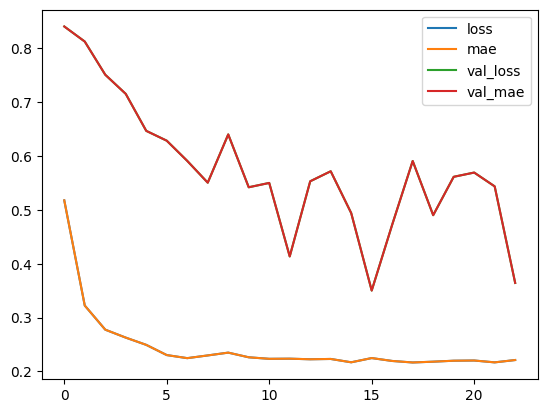

In [652]:
pd.DataFrame(hist.history).plot()

In [653]:
dnn_model.evaluate(test_df[1:].to_numpy(),test_df['^NSEI_open'].shift(1)[1:].to_numpy())

1/1 [==============================] - 0s 32ms/step - loss: 0.4178 - mae: 0.4178


[0.4178095757961273, 0.4178095757961273]

In [654]:
y_pred = dnn_model.predict(test_df)

1/1 [==============================] - 0s 181ms/step


In [656]:
test_df

,^DJI_open,^DJI_high,^DJI_low,^DJI_close,^DJI_volume,BTC-USD_open,BTC-USD_high,BTC-USD_low,BTC-USD_close,BTC-USD_volume,...,^NSEI_low,^NSEI_close,^NSEI_volume,vix_open,vix_high,vix_low,vix_close,vix_prev close,vix_change,vix_ change
2024-01-02,0.946508,0.949470,0.947189,0.952089,0.318290,0.636643,0.650322,0.648517,0.648518,0.103828,...,0.971356,0.974588,0.145610,0.175582,0.174064,0.187469,0.060499,0.061860,0.409572,0.480350
2024-01-03,0.949725,0.941290,0.942568,0.937907,0.284223,0.648689,0.644266,0.595278,0.615719,0.123978,...,0.967532,0.964294,0.172225,0.174386,0.170601,0.184573,0.053932,0.060499,0.390428,0.436922
2024-01-04,0.939312,0.945724,0.943719,0.938412,0.354370,0.615937,0.633065,0.624746,0.636422,0.078270,...,0.971972,0.974088,0.187300,0.168615,0.163993,0.173912,0.043486,0.053932,0.375819,0.401750
2024-01-05,0.940853,0.941005,0.938735,0.939695,0.257074,0.636734,0.626699,0.626480,0.636154,0.083700,...,0.976443,0.977708,0.170790,0.159435,0.155451,0.164369,0.033958,0.043486,0.379345,0.404888
2024-01-08,0.934313,0.944529,0.935071,0.950494,0.332654,0.632935,0.670461,0.633751,0.679805,0.113636,...,0.967016,0.963993,0.127830,0.151063,0.156923,0.166244,0.045289,0.033958,0.456423,0.600396
2024-01-09,0.944329,0.937382,0.941166,0.942635,0.245481,0.680199,0.680784,0.665419,0.666890,0.105225,...,0.968742,0.966201,0.126229,0.161020,0.155884,0.168153,0.042567,0.045289,0.404534,0.466975
2024-01-10,0.945828,0.946963,0.948588,0.951127,0.233045,0.666729,0.677018,0.653364,0.674477,0.134826,...,0.963956,0.971322,0.119823,0.158628,0.168033,0.168614,0.038586,0.042567,0.400000,0.455086
2024-01-11,0.955745,0.950072,0.943670,0.951889,0.257146,0.675043,0.697216,0.672287,0.670448,0.122515,...,0.973991,0.973298,0.117338,0.155130,0.152248,0.166244,0.035830,0.038586,0.404534,0.465819
2024-01-12,0.959366,0.951260,0.945925,0.946012,0.232695,0.670357,0.659464,0.612535,0.615796,0.115323,...,0.982388,0.990449,0.162728,0.152708,0.153344,0.163480,0.040355,0.035830,0.431234,0.534511
2024-01-16,0.942797,0.936914,0.932721,0.934468,0.352032,0.610393,0.614676,0.615420,0.620488,0.059908,...,1.000000,1.000000,0.161458,0.164878,0.162088,0.164336,0.046786,0.049678,0.404030,0.466149


In [663]:
y_pred[:,1].shape

(24, 1)

<AxesSubplot: >

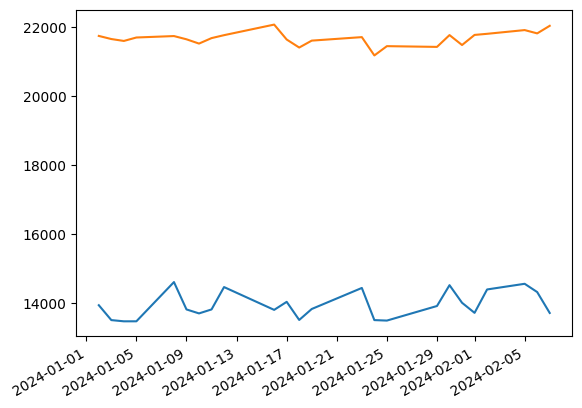

In [682]:
tdf = test_df.copy()
tdf['^NSEI_open'] = y_pred[:,-2]

pd.DataFrame(scaler.inverse_transform(tdf),index=test_df.index,columns=test_df.columns)['^NSEI_open'].plot()
pd.DataFrame(scaler.inverse_transform(test_df),index=test_df.index,columns=test_df.columns)['^NSEI_open'].plot()

## simple features

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

only_nifty_df = fi_df[['^NSEI_close','^NSEI_open','^NSEI_high','^NSEI_low','^NSEI_volume']]

# Preprocess data

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(only_nifty_df.drop('^NSEI_open',axis=1))
scaled_target = scaler.fit_transform(only_nifty_df[['^NSEI_open']])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, scaled_target, test_size=0.2, random_state=42)

In [28]:
scaled_data.shape[1]

4

In [29]:
import tensorflow as tf
# Define model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(scaled_data.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Predict opening price
predictions = model.predict(X_test)

# Inverse scaling to get actual prices
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Print example predictions and actual values
for i in range(10):
    print("Predicted opening price:", predictions[i][0], "Actual opening price:", y_test[i][0])

Epoch 1/100
37/37 [==============================] - 2s 19ms/step - loss: 0.0995 - val_loss: 0.0088
Epoch 2/100
37/37 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 8.5804e-04
Epoch 3/100
37/37 [==============================] - 0s 10ms/step - loss: 2.8949e-04 - val_loss: 1.0490e-04
Epoch 4/100
37/37 [==============================] - 0s 7ms/step - loss: 6.0818e-05 - val_loss: 4.8347e-05
Epoch 5/100
37/37 [==============================] - 0s 7ms/step - loss: 3.9752e-05 - val_loss: 3.8939e-05
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 3.5366e-05 - val_loss: 3.4752e-05
Epoch 7/100
37/37 [==============================] - 1s 17ms/step - loss: 3.3466e-05 - val_loss: 3.8437e-05
Epoch 8/100
37/37 [==============================] - 0s 7ms/step - loss: 3.1857e-05 - val_loss: 3.2134e-05
Epoch 9/100
37/37 [==============================] - 0s 11ms/step - loss: 3.1363e-05 - val_loss: 2.8309e-05
Epoch 10/100
37/37 [========================

### only nifty with technical analysis

In [41]:
df

,Open,High,Low,Close
datetime,,,,
2024-02-07,22045.05,22053.30,21860.15,21930.50
2024-02-06,21825.20,21951.40,21737.55,21929.40
2024-02-05,21921.05,21964.30,21726.95,21771.70
2024-02-02,21812.75,22126.80,21805.55,21853.80
2024-02-01,21780.65,21832.95,21658.75,21697.45
...,...,...,...,...
2000-01-07,1616.60,1628.25,1597.20,1613.30
2000-01-06,1595.80,1639.00,1595.80,1617.60
2000-01-05,1634.55,1635.50,1555.05,1595.80


In [48]:
import yfinance as yf

# Define symbols, start, and end dates
# symbols = ['^DJI', 'BTC-USD', 'ETH-USD', 'CL=F', 'GC=F', 'SI=F', 'NG=F', 'DX-Y.NYB', '^BSESN', '^NDX', '^GSPC', '^NSEI']
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2024, 4, 11)

# Function to fetch historical data for a symbol
def fetch_data(symbol):
    data = yf.download(symbol, start=start, end=end)
    return data

# Fetch data for all symbols and create a DataFrame
# dfs = [fetch_data(symbol) for symbol in symbols]
# result_df = pd.concat(dfs, axis=1, join='inner')

# Print the resulting DataFrame
# print(result_df.head())

# pd.DataFrame(fetch_data())
nifty_df = fetch_data('^NSEI')
nifty_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2024-04-04,22592.099609,22619.000000,22303.800781,22514.650391,22514.650391,401000
2024-04-05,22486.400391,22537.599609,22427.599609,22513.699219,22513.699219,242200
2024-04-08,22578.349609,22697.300781,22550.349609,22666.300781,22666.300781,227600


In [52]:
nifty_df = nifty_df[nifty_df['Volume'] !=0]

In [53]:
from ta import add_all_ta_features
from ta.utils import dropna
import yfinance as yf

start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2024, 4, 11)

# Function to fetch historical data for a symbol
def fetch_data(symbol):
    data = yf.download(symbol, start=start, end=end)
    return data

# Clean NaN values
nifty_df = dropna(nifty_df)


nifty_df_ta = add_all_ta_features(
    nifty_df, open="Open", high="High", low="Low", close="Close", volume='Volume', fillna=True)



In [57]:
nifty_df_ta

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900,2.304473e+04,130900,0.176048,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6082.299805,0.000000,0.000000,0.000000
2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000,-7.200779e+04,1900,-0.277060,-4.360175e+06,...,-0.044348,-0.008870,-0.035479,-0.115913,-0.023183,-0.092730,6068.283873,-0.555708,-0.557257,-0.555708
2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000,-2.230499e+04,138900,-0.056198,-3.623782e+06,...,-0.071001,-0.021296,-0.049705,0.281652,0.037784,0.243868,6062.359846,0.095888,0.095842,-0.460352
2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200,-1.333601e+05,-46300,-0.229102,-4.030768e+06,...,-0.137032,-0.044443,-0.092589,3.415696,0.713367,2.702330,6043.882549,-0.577271,-0.578943,-1.034966
2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600,-1.210903e+04,101300,-0.016595,-2.288908e+06,...,-0.114530,-0.058460,-0.056069,3.596169,1.289927,2.306242,6056.915734,0.918701,0.914506,-0.125773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-04,22592.099609,22619.000000,22303.800781,22514.650391,22514.650391,401000,4.054924e+07,68667000,0.047648,1.639070e+07,...,0.439413,0.289723,0.149690,1.339262,2.415564,-1.076303,22106.580319,0.356591,0.355957,270.166732
2024-04-05,22486.400391,22537.599609,22427.599609,22513.699219,22513.699219,242200,4.068619e+07,68424800,0.060847,1.401626e+07,...,0.500829,0.331944,0.168885,-1.492006,1.634050,-3.126056,22216.851821,-0.004225,-0.004225,270.151093
2024-04-08,22578.349609,22697.300781,22550.349609,22666.300781,22666.300781,227600,4.081776e+07,68652400,0.072271,1.697567e+07,...,0.597566,0.385069,0.212498,-4.159609,0.475318,-4.634928,22347.265519,0.677816,0.675530,272.660038


In [118]:
from sklearn.preprocessing import MinMaxScaler

# Scaler
scaler = MinMaxScaler()

# Create copy of Data frame
# selected_df = combined_df.copy() # copy data frame

# Scaler Data frame
selected_df = pd.DataFrame(scaler.fit_transform(nifty_df_ta),index=nifty_df_ta.index,columns=nifty_df_ta.columns)

sequence_length = 21  # Train upto last sequence_len days
batch_size = 16  # batch size len / batch_size feed at a time 
target_col = 'Open' # need to predict 

# Split data
train_df = selected_df[:'2023-12-31']
val_df = selected_df['2023-12-31':'2024-03-01']
test_df = selected_df['2024-03-01':]

In [115]:
train_df.shape,val_df.shape,test_df.shape

((2664, 92), (42, 92), (25, 92))

In [116]:
future_days = 7
batch_size = 16

def split_input_and_target(ds,ahead=future_days,target_col=0):
    return ds[:,:-ahead],ds[:,-ahead:,target_col]

# Create TF data frame to feed easly
ahead_train_ds = tf.keras.utils.timeseries_dataset_from_array(
                    train_df.to_numpy(),
                    targets=None,
                    sequence_length=sequence_length+future_days,
                    batch_size=batch_size
).map(split_input_and_target)

ahead_val_ds = tf.keras.utils.timeseries_dataset_from_array(
                    val_df.to_numpy(),
                    targets=None,
                    sequence_length=sequence_length+future_days,
                    batch_size=batch_size
).map(split_input_and_target)

In [92]:
simple_ahead_rnn = keras.models.Sequential([
    keras.layers.LSTM(512,input_shape=[None,92]),
#     keras.layers.SimpleRNN(512,return_sequences=True),
#     keras.layers.Dropout(.2),
#     keras.layers.SimpleRNN(128,return_sequences=True),
#     keras.layers.Dense(1024),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(.2),
    keras.layers.Dense(future_days)
])

opt = tf.keras.optimizers.SGD(learning_rate=0.2,momentum=0.9)
simple_ahead_rnn.compile(loss=keras.losses.Huber(),optimizer=opt,metrics=['mae'])
simple_ahead_rnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 512)               1239040   
                                                                 
 dense_20 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 1,242,631
Trainable params: 1,242,631
Non-trainable params: 0
_________________________________________________________________


In [93]:
early_stopping =  keras.callbacks.EarlyStopping(patience=5)
hist_ahead = simple_ahead_rnn.fit(ahead_train_ds,validation_data=ahead_val_ds,epochs=100,callbacks=[early_stopping])

Epoch 1/100
165/165 [==============================] - 14s 67ms/step - loss: 0.0066 - mae: 0.0903 - val_loss: 0.0070 - val_mae: 0.1016
Epoch 2/100
165/165 [==============================] - 10s 63ms/step - loss: 0.0041 - mae: 0.0627 - val_loss: 0.0019 - val_mae: 0.0530
Epoch 3/100
165/165 [==============================] - 10s 63ms/step - loss: 0.0044 - mae: 0.0601 - val_loss: 0.0023 - val_mae: 0.0621
Epoch 4/100
165/165 [==============================] - 10s 61ms/step - loss: 0.0046 - mae: 0.0600 - val_loss: 0.0015 - val_mae: 0.0433
Epoch 5/100
165/165 [==============================] - 10s 62ms/step - loss: 0.0050 - mae: 0.0632 - val_loss: 0.0016 - val_mae: 0.0479
Epoch 6/100
165/165 [==============================] - 10s 63ms/step - loss: 0.0057 - mae: 0.0692 - val_loss: 0.0015 - val_mae: 0.0458
Epoch 7/100
165/165 [==============================] - 11s 64ms/step - loss: 0.0049 - mae: 0.0620 - val_loss: 0.0011 - val_mae: 0.0398
Epoch 8/100
165/165 [==============================] - 

<AxesSubplot: >

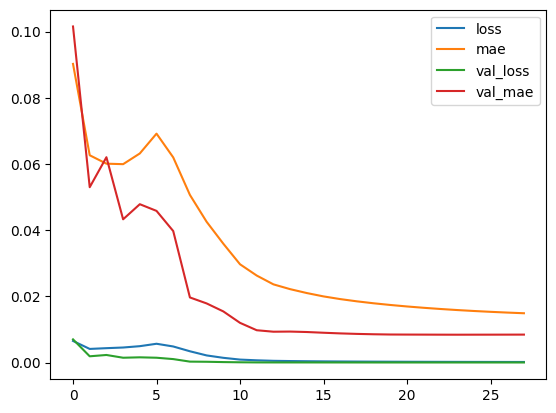

In [94]:
pd.DataFrame(hist_ahead.history).plot()

In [95]:
X = test_df.to_numpy()[np.newaxis,:sequence_length]
Y_pred = simple_ahead_rnn.predict(X)

1/1 [==============================] - 1s 572ms/step


In [96]:
scaler.inverse_transform(tdf)[0,:10]

array([2.20299429e+04, 2.23533008e+04, 2.20477500e+04, 2.23387500e+04,
       2.23387500e+04, 3.51500000e+05, 4.01990826e+07, 6.67405000e+07,
       1.17017714e-01, 2.00219728e+07])

C:\Users\jeetc\AppData\Local\Temp\ipykernel_30848\2635656243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Open'][:future_days] = Y_pred[0]


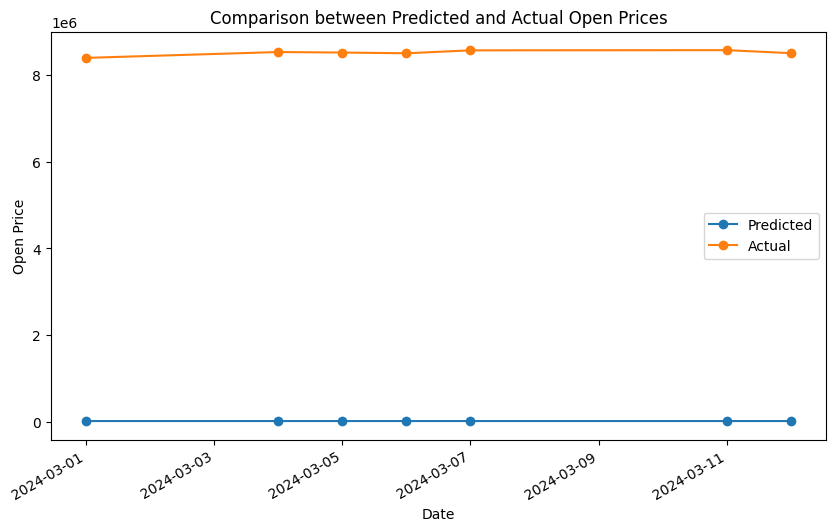

In [117]:
tdf = test_df.copy()
tdf['Open'][:future_days] = Y_pred[0]

# Plotting with labels
plt.figure(figsize=(10, 6))
pd.DataFrame(scaler.inverse_transform(tdf), index=test_df.index, columns=test_df.columns)[:future_days]['Open'].plot(label='Predicted', marker='o')
pd.DataFrame(scaler.inverse_transform(test_df), index=test_df.index, columns=test_df.columns)[:future_days]['Open'].plot(label='Actual', marker='o')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Comparison between Predicted and Actual Open Prices')
plt.legend()
plt.show()

### train with whole data

In [98]:
nifty_df_ta[:-7]

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900,2.304473e+04,130900,0.176048,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6082.299805,0.000000,0.000000,0.000000
2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000,-7.200779e+04,1900,-0.277060,-4.360175e+06,...,-0.044348,-0.008870,-0.035479,-0.115913,-0.023183,-0.092730,6068.283873,-0.555708,-0.557257,-0.555708
2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000,-2.230499e+04,138900,-0.056198,-3.623782e+06,...,-0.071001,-0.021296,-0.049705,0.281652,0.037784,0.243868,6062.359846,0.095888,0.095842,-0.460352
2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200,-1.333601e+05,-46300,-0.229102,-4.030768e+06,...,-0.137032,-0.044443,-0.092589,3.415696,0.713367,2.702330,6043.882549,-0.577271,-0.578943,-1.034966
2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600,-1.210903e+04,101300,-0.016595,-2.288908e+06,...,-0.114530,-0.058460,-0.056069,3.596169,1.289927,2.306242,6056.915734,0.918701,0.914506,-0.125773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200,4.024356e+07,67406200,0.084225,-7.218022e+06,...,0.078729,0.375639,-0.296911,3.914830,3.759870,0.154960,21983.470275,0.791469,0.788353,261.901746
2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700,4.041282e+07,67794900,0.067431,-1.478010e+06,...,0.085303,0.317572,-0.232269,4.000318,3.807960,0.192359,21990.267997,0.385249,0.384509,263.295969
2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400,4.038315e+07,67466500,0.079236,-5.585362e+06,...,0.056197,0.265297,-0.209100,2.719701,3.590308,-0.870606,21990.978174,-0.416581,-0.417451,261.782548


In [119]:
nifty_df_ta_fin = nifty_df_ta[:-7]

scaler = MinMaxScaler()

future_days = 7
sequence_length = 21  # Train upto last sequence_len days
batch_size = 16  # batch size len / batch_size feed at a time 
target_col = 'Open' # need to predict 

selected_df = pd.DataFrame(scaler.fit_transform(nifty_df_ta_fin),index=nifty_df_ta_fin.index,columns=nifty_df_ta_fin.columns)


# Create TF data frame to feed easly
ahead_train_ds = tf.keras.utils.timeseries_dataset_from_array(
                    selected_df.to_numpy(),
                    targets=None,
                    sequence_length=sequence_length+future_days,
                    batch_size=batch_size
).map(split_input_and_target)




early_stopping =  keras.callbacks.EarlyStopping(patience=5,monitor='mae')
hist_ahead = simple_ahead_rnn.fit(ahead_train_ds,epochs=100,callbacks=[early_stopping])

<AxesSubplot: >

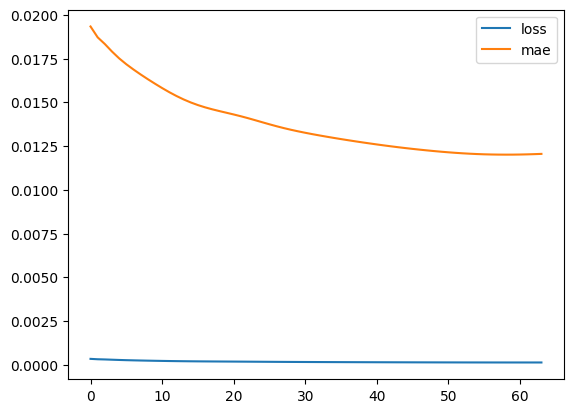

In [109]:
pd.DataFrame(hist_ahead.history).plot()

In [120]:
test_df = pd.DataFrame(scaler.fit_transform(nifty_df_ta[-7:]),index=nifty_df_ta[-7:].index,columns=nifty_df_ta[-7:].columns)


X = test_df.to_numpy()[np.newaxis,:sequence_length]
Y_pred = simple_ahead_rnn.predict(X)

1/1 [==============================] - 0s 36ms/step


In [129]:
Y_pred[0]

array([0.875569 , 0.8313617, 0.882084 , 0.8721367, 0.8792888, 0.8870256,
       0.8950354], dtype=float32)

In [135]:
# t2['Open'][-future_days:] = Y_pred[0]
# t2[-7:]
test_df.index

DatetimeIndex(['2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05',
               '2024-04-08', '2024-04-09', '2024-04-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

0    22717.890434
1    22701.118177
2    22720.362237
3    22716.588228
4    22719.301730
5    22722.237076
6    22725.275994
Name: 0, dtype: float64

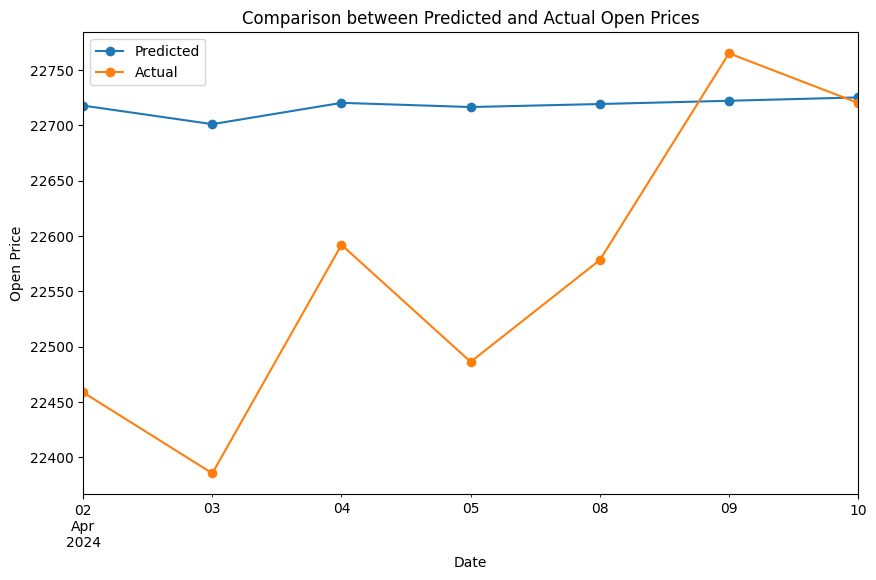

In [144]:
# tdf = test_df.copy()
# t2 = train_df.copy()
# t2['Open'][-future_days:] = Y_pred[0]

# Plotting with labels
plt.figure(figsize=(10, 6))
pd.DataFrame(scaler.inverse_transform(t2)[-future_days:], index=test_df.index, columns=t2.columns)['Open'].plot(label='Predicted', marker='o')
pd.DataFrame(scaler.inverse_transform(test_df), index=test_df.index, columns=test_df.columns)[:future_days]['Open'].plot(label='Actual', marker='o')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Comparison between Predicted and Actual Open Prices')
plt.legend()
plt.show()

In [113]:
simple_ahead_rnn.save('trained_model.h5')